In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_ab_bins(grid_size=16):
    a_range = np.arange(-128, 127, grid_size)
    b_range = np.arange(-128, 127, grid_size)
    ab_bins = np.array([[a, b] for a in a_range for b in b_range])

    return ab_bins

In [3]:
ab_bins = create_ab_bins(16)
ab_bins

array([[-128, -128],
       [-128, -112],
       [-128,  -96],
       [-128,  -80],
       [-128,  -64],
       [-128,  -48],
       [-128,  -32],
       [-128,  -16],
       [-128,    0],
       [-128,   16],
       [-128,   32],
       [-128,   48],
       [-128,   64],
       [-128,   80],
       [-128,   96],
       [-128,  112],
       [-112, -128],
       [-112, -112],
       [-112,  -96],
       [-112,  -80],
       [-112,  -64],
       [-112,  -48],
       [-112,  -32],
       [-112,  -16],
       [-112,    0],
       [-112,   16],
       [-112,   32],
       [-112,   48],
       [-112,   64],
       [-112,   80],
       [-112,   96],
       [-112,  112],
       [ -96, -128],
       [ -96, -112],
       [ -96,  -96],
       [ -96,  -80],
       [ -96,  -64],
       [ -96,  -48],
       [ -96,  -32],
       [ -96,  -16],
       [ -96,    0],
       [ -96,   16],
       [ -96,   32],
       [ -96,   48],
       [ -96,   64],
       [ -96,   80],
       [ -96,   96],
       [ -96,

In [4]:
ab_bins.shape

(256, 2)

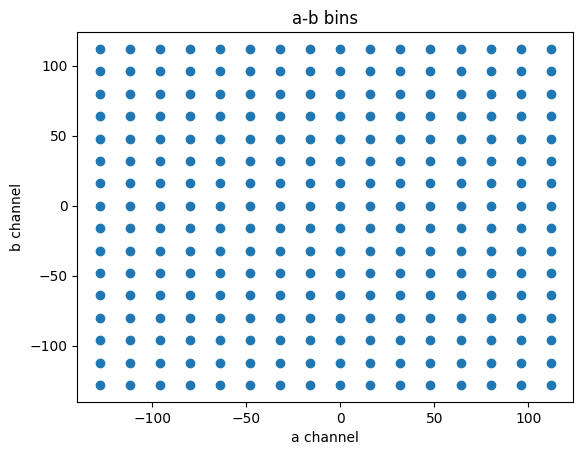

In [5]:
plt.plot(ab_bins[:, 0], ab_bins[:, 1], 'o')
plt.xlabel('a channel')
plt.ylabel('b channel')
plt.title('a-b bins')
plt.show();